In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import os

USE_TEST_DATA = os.getenv("CI", "false") == "true"

if USE_TEST_DATA:
    file_path = "../test_data/sierraleone-bumbuna.csv"
else:
    file_path = "../data/sierraleone-bumbuna.csv"

df = pd.read_csv(file_path)
print("Loaded:", file_path)

In [2]:
#data prfiling section
#lets previw the dataset
df.head()



,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [3]:
df.tail()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525599,2022-10-30 00:00,-1.7,-0.1,-3.4,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


In [4]:
#step 1, chacking the data type 
df.dtypes


Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [36]:
# so from the above i have seen that timestamp is objext but should be datetime64
#
#so i need to convert theis column to proper datetime format to allow time-based analysis


# and also comments is described as float 64 but i was suppoested to be like text
#
#so this column is likely empty or wrongly formatted 

#now lets fix 

In [5]:
#fix 1, convert timestam to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
#errors='coerce' will convert invalid dates to NaT (missing) — we’ll check for those later.


In [6]:
#fix 2, inspect comments 
df['Comments'].unique()
df['Comments'].value_counts(dropna=False)
#it will show if
#if it's all NaNs or just junk.
#Whether it's safe to drop or needs conversion to string.

Comments
NaN    525600
Name: count, dtype: int64

In [7]:
#so based on the output above column is 100% missing(NAN)
#it have 525600 rows and all have missed comment 
#so lets drop the comment column as it only taking space no value for analysis
df.drop(columns=['Comments'], inplace=True)

In [8]:
#step 2, lets go to the second 
# it will count the missing value
missing_counts = df.isna().sum()
# how much percentage is the missed value
missing_percent = (df.isna().mean() * 100).round(2)
# Combine into a report
missing_report = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
})
# Show only columns with missing values
missing_report = missing_report[missing_report['Missing Count'] > 0]

missing_report


,Missing Count,Missing %


In [9]:
# so based on the above result we dont have missing value in our data set so we dont need to corrent
# step 3, now lets summary statistics 
# this will help us to identfy strange or extremen un expected values 
# and we are going to chack for numeric value 

df.describe().T  # T stands for Transpose for readability of the table



,count,mean,min,25%,50%,75%,max,std
Timestamp,525600,2022-04-30 12:00:30.000000768,2021-10-30 00:01:00,2022-01-29 06:00:45,2022-04-30 12:00:30,2022-07-30 18:00:15,2022-10-30 00:00:00,NaN
GHI,525600.0,201.957515,-19.5,-2.8,0.3,362.4,1499.0,298.49515
DNI,525600.0,116.376337,-7.8,-0.3,-0.1,107.0,946.0,218.652659
DHI,525600.0,113.720571,-17.9,-3.8,-0.1,224.7,892.0,158.946032
ModA,525600.0,206.643095,0.0,0.0,3.6,359.5,1507.0,300.896893
ModB,525600.0,198.114691,0.0,0.0,3.4,345.4,1473.0,288.889073
Tamb,525600.0,26.319394,12.3,23.1,25.3,29.4,39.9,4.398605
RH,525600.0,79.448857,9.9,68.7,85.4,96.7,100.0,20.520775
WS,525600.0,1.146113,0.0,0.0,0.8,2.0,19.2,1.239248
WSgust,525600.0,1.691606,0.0,0.0,1.6,2.6,23.9,1.617053


In [42]:
#based on the above result 
#Key Issues Identified
#A. Negative Solar Radiation Values

 #   GHI, DNI, and DHI all have negative min values (e.g., GHI = -12.9 W/m²).
  # Physically impossible — sunlight cannot be negative. These are likely sensor errors.

#B. Zero Values in ModA/ModB

 #   ModA and ModB have 0.0 as min and 25% quartile.
  #  This may reflect night hours, heavy dirt, or sensor failure. Further inspection needed (e.g., compare with Cleaning or Precipitation).


#C. WDstdev High Max (99.4)

 #   Could indicate extreme turbulence or possible error.

# No Immediate Issues

 #   Tamb, RH, WS, BP, TModA, TModB all seem within expected ranges.

In [10]:
#  A, set negatives to 0 
solar_cols = ['GHI', 'DNI', 'DHI']
df[solar_cols] = df[solar_cols].clip(lower=0)


In [11]:
#B. ModA and ModB Zero Values

#Zero values may occur during:

 #   Night time (valid)

  #  Dirty panels (valid, especially if Cleaning = 1 soon after)

   # Sensor issues (possibly invalid)

#so lets first chack how frquient they are
(df[['ModA', 'ModB']] == 0).sum()


ModA    246580
ModB    246940
dtype: int64

In [12]:
# Filter to day-only hours (e.g., 6AM to 6PM) and check again: - filter by day time
df['Hour'] = df['Timestamp'].dt.hour
day_df = df[(df['Hour'] >= 6) & (df['Hour'] <= 18)]
(day_df[['ModA', 'ModB']] == 0).sum()


ModA    10543
ModB    10790
dtype: int64

In [13]:
# there r 10 thousends of zeroes apear in day time 
mod_cols = ['ModA', 'ModB']
df[mod_cols] = df[mod_cols].mask(df[mod_cols] == 0, np.nan)
df[mod_cols] = df[mod_cols].fillna(df[mod_cols].median())

#What it does:
#    Replaces the NaN values (which came from the zeros) with the median value of each column (ModA and ModB).
#    Median is used because it's less sensitive to outliers than the mean.


In [15]:
 #C. WDstdev Max = 99.4 (Unusually High Variability)

#This is not necessarily wrong, but it's worth flagging as a potential outlier.

# so lets chack how rare it is 

df[df['WDstdev'] > 50].shape

#What it does:
#It filters the DataFrame to only include rows where the wind direction standard deviation (WDstdev) is greater than 50.

#.shape tells us how many such rows exist.
#Why 50?
#    WDstdev measures how much wind direction varies.
#    A value above 50 degrees is unusually turbulent and may indicate:
#        Measurement error
#        Sudden weather changes
#        Sensor malfunction


(395, 19)

In [16]:
#lets replace outliers with median as it has impact in other columns if we remove it 
median_wdstdev = df['WDstdev'].median()
df['WDstdev'] = df['WDstdev'].mask(df['WDstdev'] > 50, median_wdstdev)
#Replaces WDstdev > 50 with the column’s median, which is a stable typical value.

In [17]:
# step 4, chack for duplicates 
# Count total duplicate rows (excluding the first occurrence)
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows found: {duplicate_count}")




Duplicate rows found: 0


In [51]:
#so we dont do any things as there is no duplicate value 


In [18]:
# step 5 Check for Inconsistent or Unexpected Values

#A, We'll look at specific columns and compare their values against what’s physically realistic or expected.

print("WD min:", df['WD'].min())
print("WD max:", df['WD'].max())

#valid range 0<=WD<=360

WD min: 0.0
WD max: 360.0


In [19]:
#B, Cleaning Flag – should only be 0 or 1
print("Unique values in Cleaning column:", df['Cleaning'].unique())


Unique values in Cleaning column: [0 1]


In [20]:
# C, Precipitation – should be ≥ 0
print("Min Precipitation:", df['Precipitation'].min())



Min Precipitation: 0.0


In [21]:
#D, Relative Humidity (RH) – should be between 0% and 100%

print("RH min:", df['RH'].min())
print("RH max:", df['RH'].max())


RH min: 9.9
RH max: 100.0


In [22]:
# step 6 time gpas or irregular intervals

df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Ensure it's in datetime format
time_diffs = df['Timestamp'].diff()
print(time_diffs.value_counts().head())


Timestamp
0 days 00:01:00    525599
Name: count, dtype: int64


In [57]:
# that means the time series data has a regular sampling frequency of 1-minute intervals no need to corect it.

In [23]:
# step 7 identfiy if there is constant columns 
#These are columns where all rows have the same value 
# they provide no variance and hence, no useful information for analysis or modeling.

constant_cols = df.nunique()
constant_cols = constant_cols[constant_cols == 1]
print("Constant columns:\n", constant_cols)


Constant columns:
 Series([], dtype: int64)


In [24]:
# no constant column 

#so now lets save our cleaned data 
# Create folder
# Go one level up from 'scripts' to its parent directory
base_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
# Define the path for cleaned_data folder at the same level as scripts
cleaned_data_path = os.path.join(base_path, 'cleaned_data')
# Create the folder if it doesn't exist
os.makedirs(cleaned_data_path, exist_ok=True)
# Save the cleaned DataFrame
file_path = os.path.join(cleaned_data_path, 'sierraleone_cleaned_data.csv')
df.to_csv(file_path, index=False)
print(f"Saved to: {file_path}")



Saved to: /home/nurye/Desktop/10_Academy/week_0/WEEK_0_CHALLENGE/MoonLight-Energy-Solutions-Data-Analysis/MoonLight-Energy-Solutions-Data-Analysis/cleaned_data/sierraleone_cleaned_data.csv


# as we have already finished data profiling and data preparation 
## next lets go to EDA

In [25]:
# loading cleanined data from folder we saved before 
# Load cleaned dataset from one level above 'scripts' folder
# Load the cleaned dataset
file_path = "../cleaned_data/benin_cleaned_data.csv"
df_cleaned = pd.read_csv(file_path)
# Confirm load
print(" Cleaned data loaded.")
print("Shape:", df_cleaned.shape)
df_cleaned.head()



 Cleaned data loaded.
Shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Hour
0,2021-08-09 00:01:00,0.0,0.0,0.0,422.6,409.6,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,0
1,2021-08-09 00:02:00,0.0,0.0,0.0,422.6,409.6,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,0
2,2021-08-09 00:03:00,0.0,0.0,0.0,422.6,409.6,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,0
3,2021-08-09 00:04:00,0.0,0.0,0.0,422.6,409.6,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,0
4,2021-08-09 00:05:00,0.0,0.0,0.0,422.6,409.6,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,0


In [26]:
# just to chack my cleaned data
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,241.958821,330.101787,0.0,0.00,1.8,483.40,1413.0
DNI,525600.0,167.441866,261.547532,0.0,0.00,0.0,314.20,952.3
DHI,525600.0,116.993033,157.463619,0.0,0.00,1.6,216.30,759.2
ModA,525600.0,434.014290,240.620155,0.1,381.50,422.6,463.70,1342.3
ModB,525600.0,420.571856,232.847166,0.1,370.70,409.6,447.90,1342.3
Tamb,525600.0,28.179683,5.924297,11.0,24.20,28.0,32.30,43.8
RH,525600.0,54.487969,28.073069,2.1,28.80,55.1,80.10,100.0
WS,525600.0,2.121113,1.603466,0.0,1.00,1.9,3.10,19.5
WSgust,525600.0,2.809195,2.029120,0.0,1.30,2.6,4.10,26.6
WSstdev,525600.0,0.473390,0.273395,0.0,0.40,0.5,0.60,4.2


In [27]:
# EDA
#1, SUMMERY STATISTICS 
df_cleaned.describe().T


,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,241.958821,330.101787,0.0,0.00,1.8,483.40,1413.0
DNI,525600.0,167.441866,261.547532,0.0,0.00,0.0,314.20,952.3
DHI,525600.0,116.993033,157.463619,0.0,0.00,1.6,216.30,759.2
ModA,525600.0,434.014290,240.620155,0.1,381.50,422.6,463.70,1342.3
ModB,525600.0,420.571856,232.847166,0.1,370.70,409.6,447.90,1342.3
Tamb,525600.0,28.179683,5.924297,11.0,24.20,28.0,32.30,43.8
RH,525600.0,54.487969,28.073069,2.1,28.80,55.1,80.10,100.0
WS,525600.0,2.121113,1.603466,0.0,1.00,1.9,3.10,19.5
WSgust,525600.0,2.809195,2.029120,0.0,1.30,2.6,4.10,26.6
WSstdev,525600.0,0.473390,0.273395,0.0,0.40,0.5,0.60,4.2


In [28]:
#  value counts for discrete / binary columns 
print(df_cleaned['Cleaning'].value_counts())
print(df_cleaned['Precipitation'].value_counts().sort_index().tail())


Cleaning
0    525115
1       485
Name: count, dtype: int64
Precipitation
2.1     3
2.2     7
2.3    10
2.4     5
2.5     1
Name: count, dtype: int64


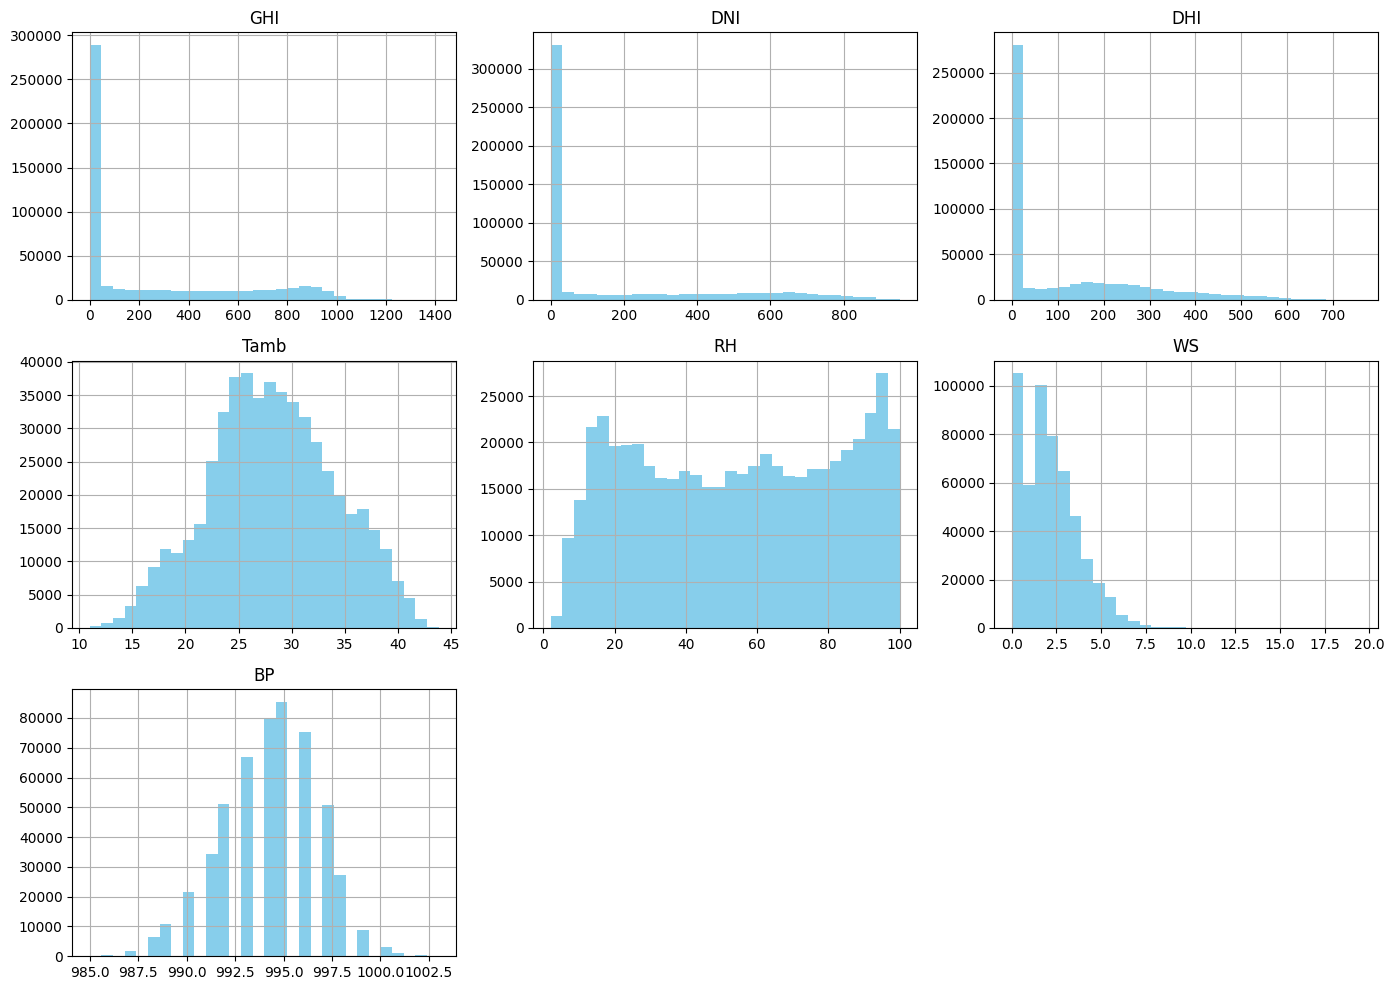

In [29]:
#, 3, histograms for key numerical features 
import matplotlib.pyplot as plt
df_cleaned[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP']].hist(bins=30, figsize=(14, 10), color='skyblue')
plt.tight_layout()
plt.show()


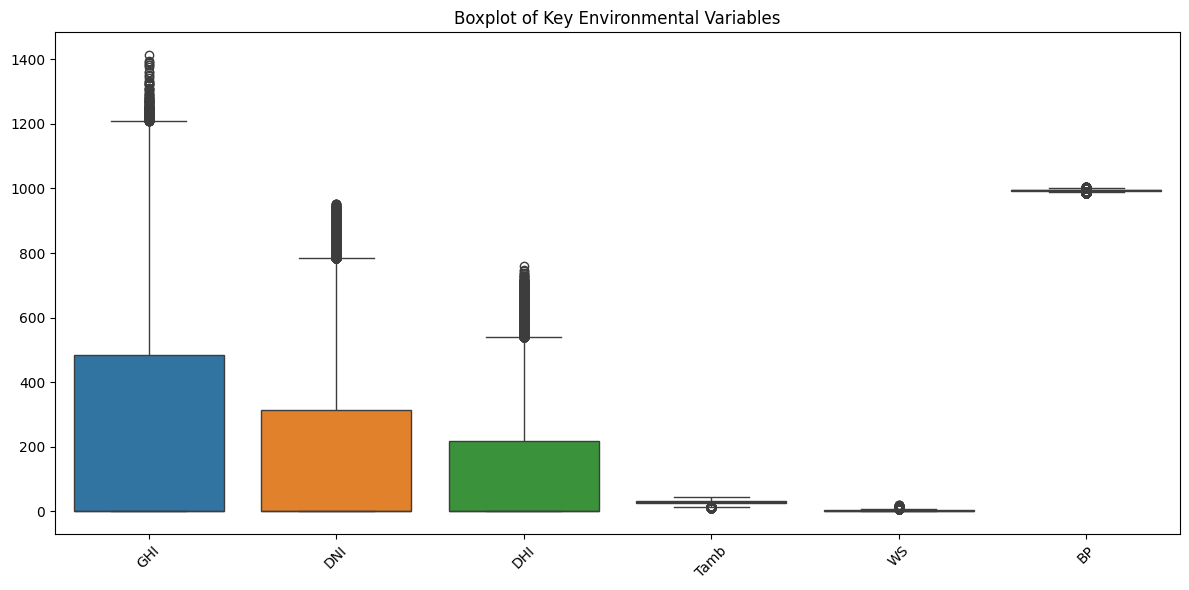

In [30]:
#, 4, box plots (outlier detection + distribution insights)
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[['GHI', 'DNI', 'DHI', 'Tamb', 'WS', 'BP']])
plt.title("Boxplot of Key Environmental Variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


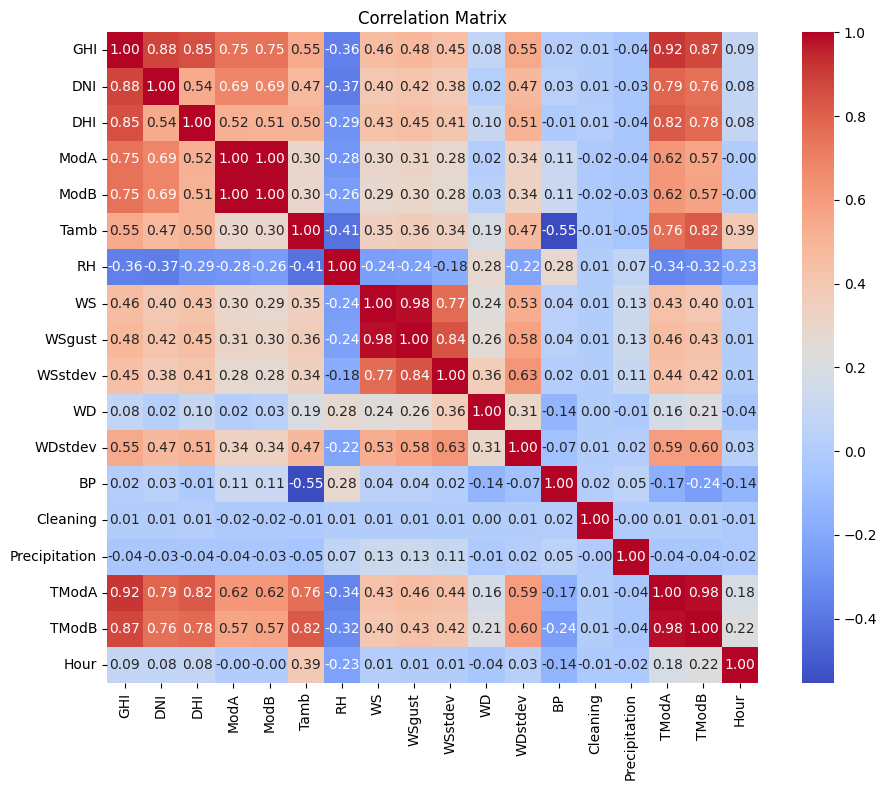

In [31]:
#5, corrolation matrix or heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


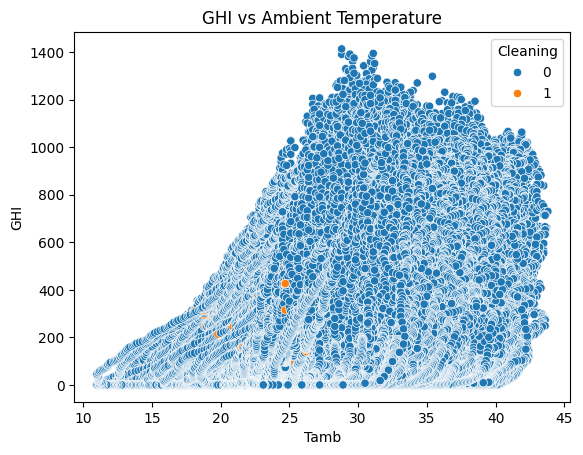

In [32]:
# 6, scatter plot: solar irradiance vs temperatue
sns.scatterplot(x='Tamb', y='GHI', data=df_cleaned, hue='Cleaning')
plt.title("GHI vs Ambient Temperature")
plt.show()



/tmp/ipykernel_5698/1516343763.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='GHI', data=hourly_ghi, palette='viridis')


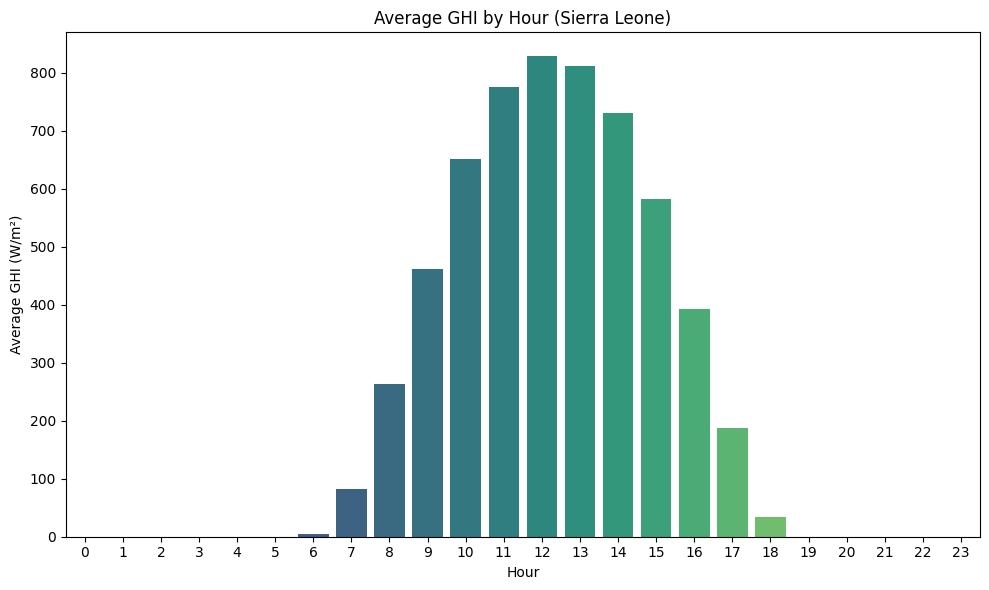

In [39]:
# 7, bar chart : average GHI by hour 
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])

# Step 2: Extract hour
df_cleaned['Hour'] = df_cleaned['Timestamp'].dt.hour

# Step 3: Group by hour and calculate average GHI
hourly_ghi = df_cleaned.groupby('Hour')['GHI'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='GHI', data=hourly_ghi, palette='viridis')
plt.title("Average GHI by Hour (Sierra Leone)")
plt.xlabel("Hour")
plt.ylabel("Average GHI (W/m²)")
plt.tight_layout()
plt.savefig("../graphs/sierraleone/sierraleone_ghi_by_hour.png", dpi=150, bbox_inches='tight')
plt.show()





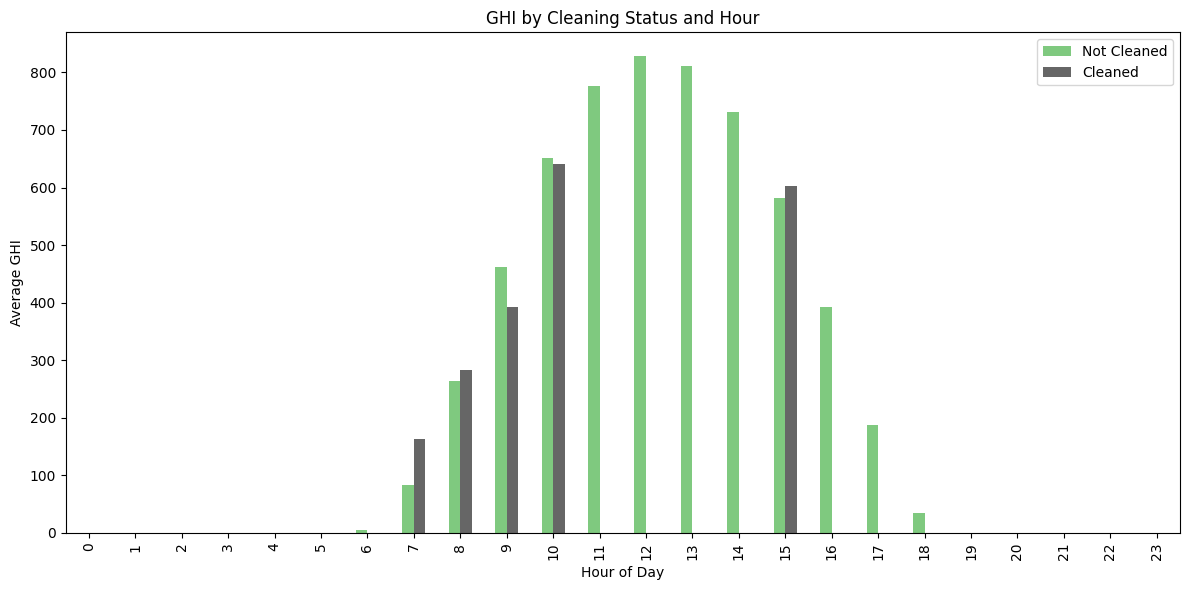

In [40]:
# 8, pivote table: GHI by cleaning status and hour
pivot = df_cleaned.pivot_table(values='GHI', index='Hour', columns='Cleaning', aggfunc='mean')

pivot.plot(kind='bar', figsize=(12, 6), colormap='Accent')
plt.title("GHI by Cleaning Status and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average GHI")
plt.legend(["Not Cleaned", "Cleaned"])
plt.tight_layout()
plt.show()


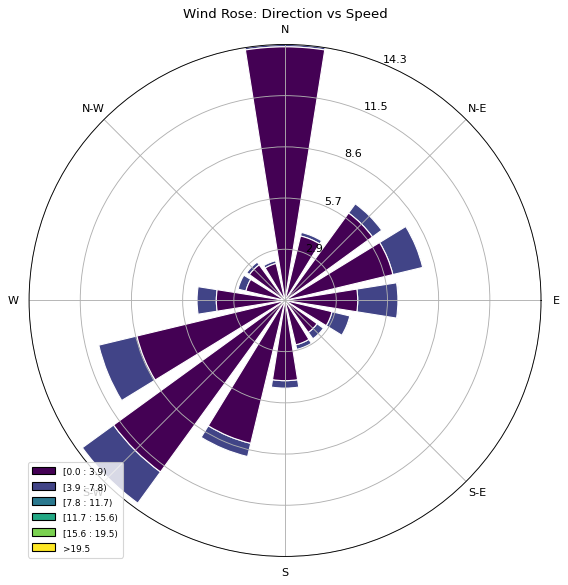

In [42]:
# 9, windorose plote
# to visulaize wind direction and speed this requires a special plot type

from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df_cleaned['WD'], df_cleaned['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Rose: Direction vs Speed")
plt.savefig("../graphs/sierraleone/windorose_plote.png", bbox_inches='tight', dpi=150)
plt.show()



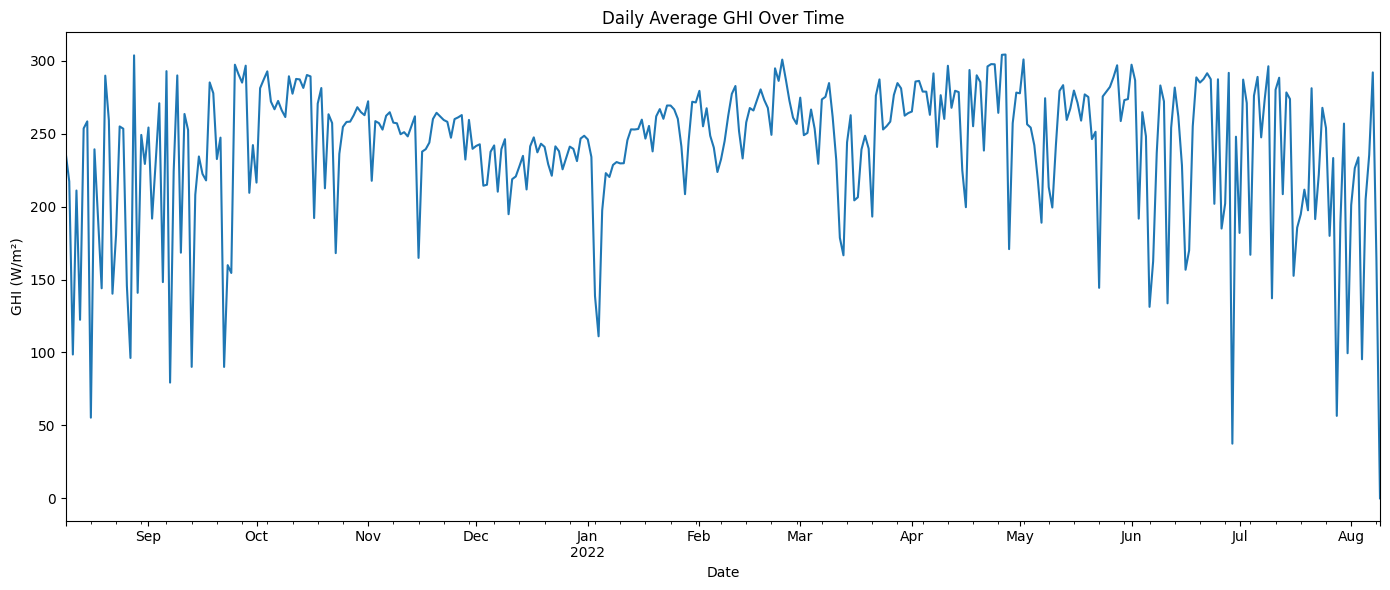

In [43]:
# 10, time series plot for GHI over time
# helps to analyze seasonal/daily trends in solar radiation 
plt.figure(figsize=(14, 6))
df_cleaned.set_index('Timestamp')['GHI'].resample('D').mean().plot()
plt.title("Daily Average GHI Over Time")
plt.xlabel("Date")
plt.ylabel("GHI (W/m²)")
plt.tight_layout()
plt.show()


                ModA        ModB
Cleaning                        
0         434.131390  420.681396
1         307.229278  301.972165


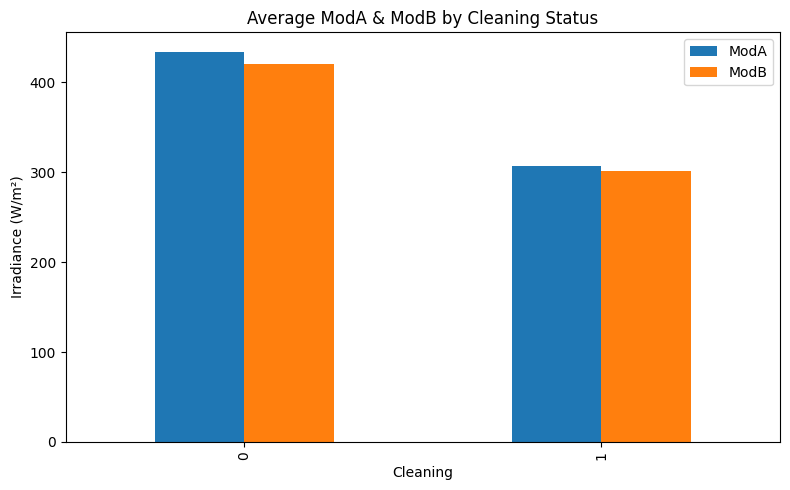

In [44]:
# 11 cleaning impact 
cleaning_impact = df_cleaned.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(cleaning_impact)

cleaning_impact.plot(kind='bar', figsize=(8, 5), title="Average ModA & ModB by Cleaning Status")
plt.ylabel("Irradiance (W/m²)")
plt.tight_layout()
plt.show()


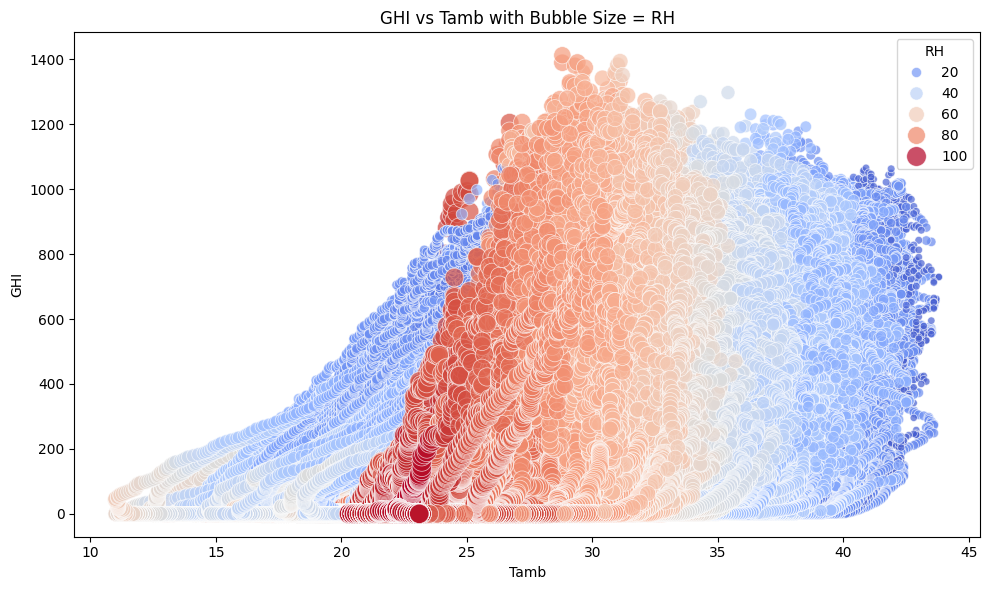

In [45]:
# 12, bubble chart thisi s GHI VS TAMB with bubble size = RH or BP
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned, 
    x='Tamb', 
    y='GHI', 
    size='RH', 
    hue='RH', 
    sizes=(20, 200), 
    palette='coolwarm', 
    alpha=0.7
)
plt.title("GHI vs Tamb with Bubble Size = RH")
plt.tight_layout()
plt.savefig("../graphs/sierraleone/sierraleone_bubble_chart.png", bbox_inches='tight', dpi=150)
plt.show()



#Scatter plot in step 6	Shows relationship between 2 variables (Tamb vs GHI), with color for Cleaning
#Bubble Chart in step 12 Adds a 3rd variable (like RH or BP) as the bubble size — gives extra dimension